In [22]:
#Carga de librerías
from matplotlib import pyplot as plt
from astropy.timeseries import LombScargle
import numpy as np
import sympy as sp
from tqdm import tqdm
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia
from scipy.optimize import curve_fit
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks
from astropy.stats import biweight_location as BWL

In [23]:
#Carga de archivos
num = '001'#str(input("Número: "))
file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ECL-000{num}.dat'
name = f'OGLE-BLG-ECL-000{num}'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
time = np.array(df['hjd'])
mags = np.array(df['mag'])
errs = np.array(df['err'])

C:\Users\damia\AppData\Local\Temp\ipykernel_21964\2814327554.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])


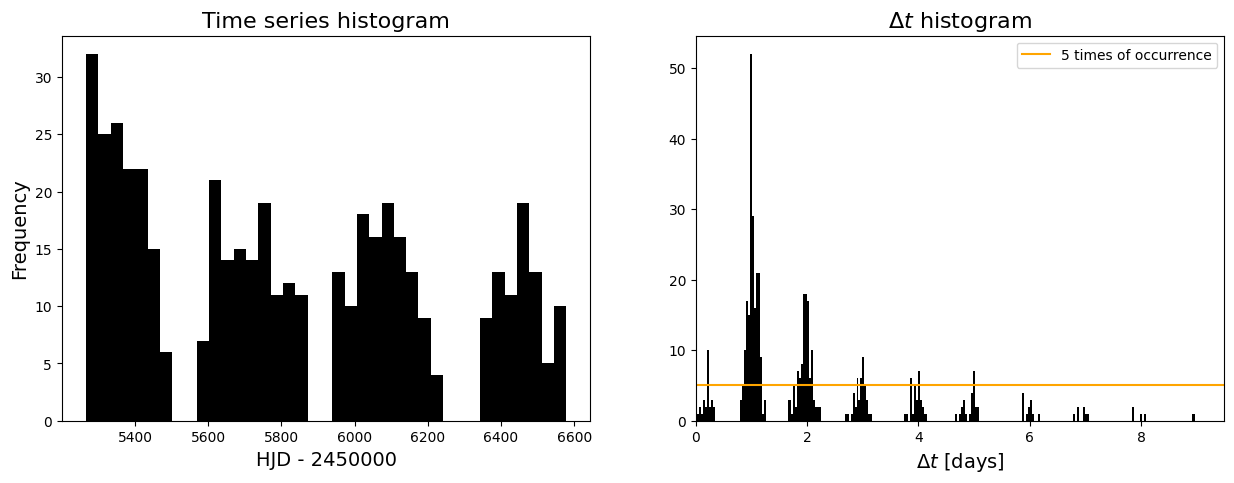

In [24]:
#Histograma temporal de datos
fig,axs = plt.subplots(figsize=(15,5), ncols = 2, nrows = 1)

bins_num = int(len(time))
axs[0].hist(time, bins=int(bins_num/12), color='k', alpha=1)
axs[0].set_title('Time series histogram', fontsize = 16)
axs[0].set_xlabel('HJD - 2450000' , fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)

time_diff = np.round(np.diff(time),3)
bins_num_diff = int(len(time_diff))
axs[1].hist(time_diff, bins=7*bins_num_diff, color='k', alpha=1)
axs[1].set_title('$\\Delta t$ histogram', fontsize = 16)
axs[1].set_xlim(0,9.5)
axs[1].axhline(5,c='orange', label ='5 times of occurrence')
axs[1].set_xlabel('$\\Delta t$ [days]' , fontsize = 14)
freqs, bins = np.histogram(time_diff, bins=bins_num_diff)

axs[1].legend()

fs = 1/np.min(time_diff)

In [25]:
#Cálculo de f_s para cada estrella
FS_MODE = []
FS_MEAN = []
FS_MIN = []
I_mean = []
V_mean = []
I_max = []
V_max = []

for i in range(1,243):
    
    if i < 226:

        if i < 10:
            num_ = f'00{i}' 
        elif i > 9 and i < 100:
            num_ = f'0{i}'
        else:
            num_ = i

        file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ECL-000{num_}.dat'
        name = f'OGLE-BLG-ECL-000{num_}'

        df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
        time = np.array(df['hjd'])
        mags = np.array(df['mag'])
        errs = np.array(df['err']) 
        I_max.append(np.max(mags))
        I_mean.append(BWL(mags))
    
    elif i > 225:

        if i < 235:
            num = f'00{i - 225}' 
        elif i > 234:
            num = f'0{i - 225}'
 
        file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ELL-000{num}.dat'
        name = f'OGLE-BLG-ELL-000{num}'

        df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
        time = np.array(df['hjd'])
        mags = np.array(df['mag'])
        errs = np.array(df['err']) 
        I_max.append(np.max(mags))
        I_mean.append(BWL(mags))

    time_diff = np.round(np.diff(time),3)
    fs_mode = 1/stats.mode(time_diff)[0]
    fs_mean = 1/BWL(time_diff)
    fs_min = 1/np.min(time_diff)
    
    FS_MODE.append(fs_mode)
    FS_MEAN.append(fs_mean)
    FS_MIN.append(fs_min)

for i in range(1,243):

    if i < 226:

        if i < 10:
            num = f'00{i}' 
        elif i > 9 and i < 100:
            num = f'0{i}'
        else:
            num = i

        try:
            file_path_V = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\V\OGLE-BLG-ECL-000{num}.dat'
            name = f'OGLE-BLG-ELL-000{num}'
            df_V = pd.read_csv(file_path_V, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
            mags_V = np.array(df_V['mag'])
            V_mean.append(BWL(mags_V))
            V_max.append(np.max(mags_V))
        except FileNotFoundError:
            V_mean.append(0)
            V_max.append(0)
            
    if i > 225:

        if i < 235:
            num = f'00{i}' 
        elif (i - 225) > 9 and (i - 225) < 100:
            num = f'0{i - 225}'

        try:
            file_path_V = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\V\OGLE-BLG-ECL-000{num}.dat'
            df_V = pd.read_csv(file_path_V, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
            mags_V = np.array(df_V['mag'])
            V_mean.append(BWL(mags_V))
            V_max.append(np.max(mags_V))
        except FileNotFoundError:
            V_mean.append(0)
            V_max.append(0)

FS_MODE = np.array(FS_MODE)
FS_MEAN = np.array(FS_MEAN)
FS_MIN = np.array(FS_MIN)
FS_list = [FS_MODE,FS_MEAN,FS_MIN]

C:\Users\damia\AppData\Local\Temp\ipykernel_21964\1601849566.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
C:\Users\damia\AppData\Local\Temp\ipykernel_21964\1601849566.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
C:\Users\damia\AppData\Local\Temp\ipykernel_21964\1601849566.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
C:\Users\damia\AppData\Local\Temp\ipykernel_21964\1601849566.py:24: FutureWarning: Th

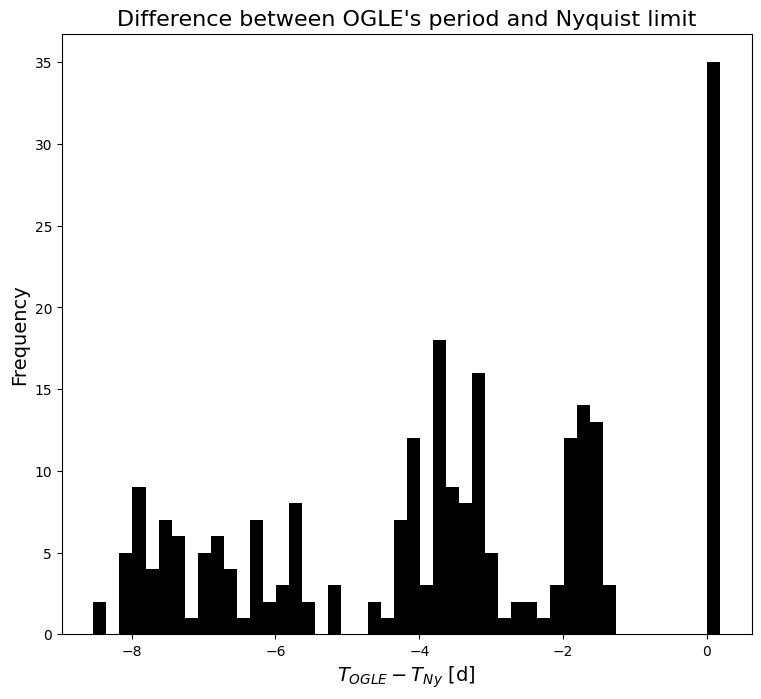

In [26]:
#Cálculo del período mínimo medible
FN = FS_MEAN/2
T = 1/FN
ra = np.array([])
dec = np.array([])

file_path = r'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\DATA_parallax.csv'
df_DATA = pd.read_csv(file_path)
rep_periods = np.array(df_DATA['P_orb'])
ra = np.append(ra,df_DATA['RA'])
dec = np.append(dec,df_DATA['Dec'])

porcentual_err = []

for i in range(len(T)):
    porcentual_err.append((np.round((rep_periods[i] - T[i]),3)))

bins_num_diff = int((len(porcentual_err))/5)
fig = plt.figure(figsize=(8.9,7.8))
plt.hist(porcentual_err, bins=bins_num_diff, color='k', alpha=1)
plt.title("Difference between OGLE's period and Nyquist limit", fontsize = 16)
plt.xlabel('$T_{OGLE} - T_{Ny}$ [d]', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

a = []
for FS in FS_list:
    idx_bad = []

    FN = FS/2
    T = 1/FN
    porcentual_err = []

    for i in range(len(T)):
        porcentual_err.append(np.round((rep_periods[i] - T[i])/T[i],3))

    for idx,k in enumerate(porcentual_err):
        if k < 0:
            idx_bad.append(idx)
    
    a.append(idx_bad)
num_l = []
for i in range(0, 242):
    if i not in a[1]:
        num_l.append(i + 1)

In [27]:
#Query en Gaia y fotometría
num_l = [18,
 23,
 25,
 60,
 64,
 65,
 72,
 74,
 81,
 88,
 97,
 107,
 108,
 135,
 138,
 141,
 142,
 231,
 233,
 235,
 238]


para_ = np.array(df_DATA['Parallax_GAIA']) 
d = []
M_I = []
M_V = []
jj = 0
for parallax in para_:
    if parallax > 0:
        d.append(1e3/parallax)
    else:
        d.append(0)
        jj += 1
        
print(jj)

for i in tqdm(range(len(d))):
    x, y = sp.symbols('x y')
    eq1 = sp.Eq(V_max[i] - x, 5 * sp.log(102, 10) - 5 + 2.5 * ((V_max[i] - I_max[i]) - (x - y)))
    eq2 = sp.Eq(I_max[i] - y, 5 * sp.log(102, 10) - 5 + 1.217 * ((V_max[i] - I_max[i]) - (x - y)))
    
    solution = sp.solve((eq1, eq2), (x, y))
    
    M_V_value = solution[x].evalf()
    M_I_value = solution[y].evalf()

    M_V.append(M_V_value)
    M_I.append(M_I_value)

V_I = np.array(V_max) - np.array(I_max)

M_If = np.array(M_I)[np.array(num_l)]
M_Vf = np.array(M_V)[np.array(num_l)]
V_If = V_I[np.array(num_l)]

127


100%|██████████| 242/242 [00:26<00:00,  9.00it/s]


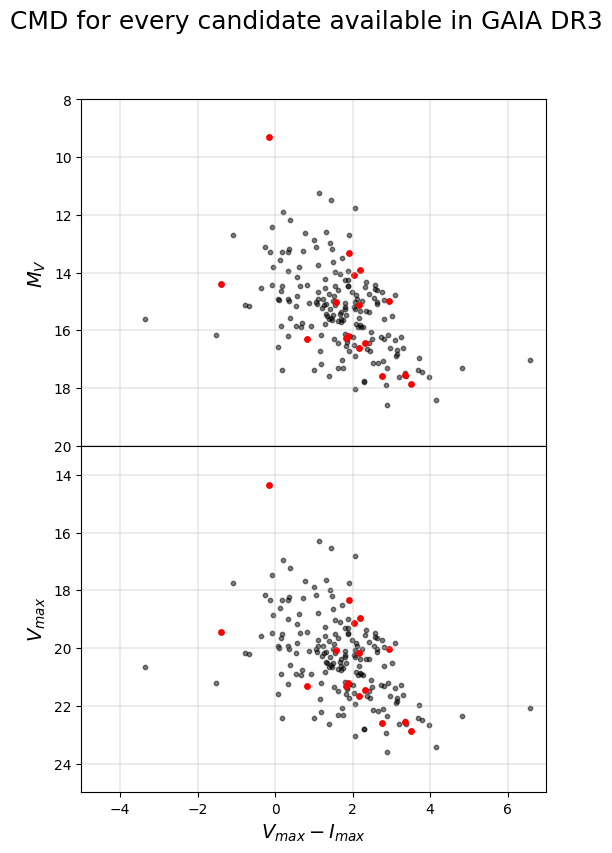

In [28]:
#Figura del CMD
fig, axs = plt.subplots(figsize=(6,9), nrows = 2, ncols = 1,sharex=True)

axs[0].scatter(V_I,M_V, c = 'k', s = 10, alpha = .5)
axs[0].scatter(V_If,M_Vf, c = 'r', s = 15, alpha = 1)
axs[0].set_xlim(-5,7)
axs[0].set_ylim(8,20)
axs[0].set_ylabel('$M_V$', fontsize = 14)
plt.suptitle('CMD for every candidate available in GAIA DR3', fontsize = 18)
axs[0].grid(True, lw = .33)
axs[0].invert_yaxis()
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].scatter(V_I,V_max, c = 'k', s = 10, alpha = .5)
axs[1].scatter(V_If,np.array(V_max)[np.array(num_l)], c = 'r', s = 15, alpha = 1)
#axs[1].set_xlim(-2,7)
axs[1].set_ylim(13,25)
axs[1].set_xlabel('$V_{max}-I_{max}$', fontsize = 14)
axs[1].set_ylabel('$V_{max}$', fontsize = 14)
axs[1].grid(True, lw = .33)
axs[1].invert_yaxis()

In [8]:
#Eliminación de descartados
idx_s = np.where(np.isin(num_l, np.array([66, 69, 70, 73, 75, 86, 103, 106, 110, 128, 131]) ))[0]
for nm in idx_s[::-1]:
    num_l.pop(nm)

C:\Users\damia\AppData\Local\Temp\ipykernel_21964\2010134542.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])


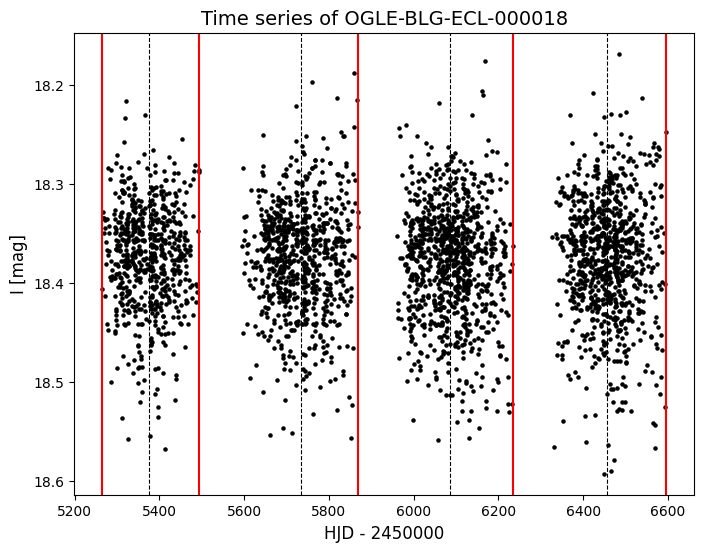

In [9]:
#Separación en momentos de toma de datos
case_datapts = 1#int(input("Caso: "))

i = num_l[0]

if i < 226:

    if i < 10:
        num_ = f'00{i}' 
    elif i > 9 and i < 100:
        num_ = f'0{i}'
    else:
        num_ = i

    file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ECL-000{num_}.dat'
    name = f'OGLE-BLG-ECL-000{num_}'

    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
    time = np.array(df['hjd'])
    mags = np.array(df['mag'])
    errs = np.array(df['err']) 

elif i > 225:

    if i < 235:
        num = f'00{i - 225}' 
    elif i > 234:
        num = f'0{i - 225}'
 
    file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ELL-000{num}.dat'
    name = f'OGLE-BLG-ELL-000{num}'

    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
    time = np.array(df['hjd'])
    mags = np.array(df['mag'])
    errs = np.array(df['err']) 
    
    
fig = plt.figure(figsize=(8,6))
time_data_pt = []
time_data_pt.append(0)
num_pts_per_window = 80
threshold = 70
plt.gca().invert_yaxis()
plt.title(f'Time series of {name}', fontsize = 14)
plt.xlabel('HJD - 2450000', fontsize = 12)
plt.ylabel('I [mag]', fontsize = 12)

def agregar_puntos_medios(lista):
    nueva_lista = []
    for i in range(len(lista) - 1):
        nueva_lista.append(lista[i])
        punto_medio = (lista[i] + lista[i + 1]) / 2
        nueva_lista.append(punto_medio)
    nueva_lista.append(lista[-1])
    return nueva_lista

if case_datapts == 1:
    jd_diff = np.diff(time)
    gap_indices = np.where(jd_diff > threshold)[0]

    for i in gap_indices:
        time_data_pt.append(i)
        
    time_data_pt.append(len(time) - 1)
    time_data_pt = list(np.int64(np.sort(time_data_pt)))

if case_datapts == 2:
    tot_data_pts = len(mags)
    n = 1
    while tot_data_pts > n*num_pts_per_window:
        time_data_pt.append(n*num_pts_per_window)
        n += 1

    time_data_pt.append(len(time) - 1)
    time_data_pt = list(np.int64(np.sort(time_data_pt)))

#time_data_pt = list(np.int64(np.array(agregar_puntos_medios(time_data_pt))))


for i in time_data_pt:
    plt.axvline(time[i],c='r',zorder=2)

mean_time_data_pt = np.array([])
for asdf in range(len(time_data_pt) - 1):
    mean_time_data_pt = np.append(mean_time_data_pt,np.median(time[time_data_pt[0+asdf]:time_data_pt[1+asdf]]))
mean_time_data_pt = np.int64(mean_time_data_pt)

for i in mean_time_data_pt:
    plt.axvline(i,c='k',zorder=-2,ls='--',lw=.8)

plt.scatter(time, mags, c='k', s = 5)


C:\Users\damia\AppData\Local\Temp\ipykernel_21964\2683036009.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
C:\Users\damia\AppData\Local\Temp\ipykernel_21964\2683036009.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])


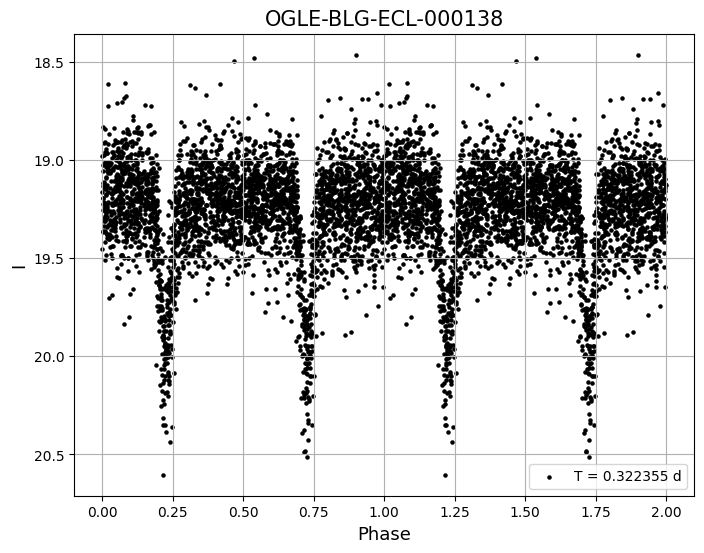

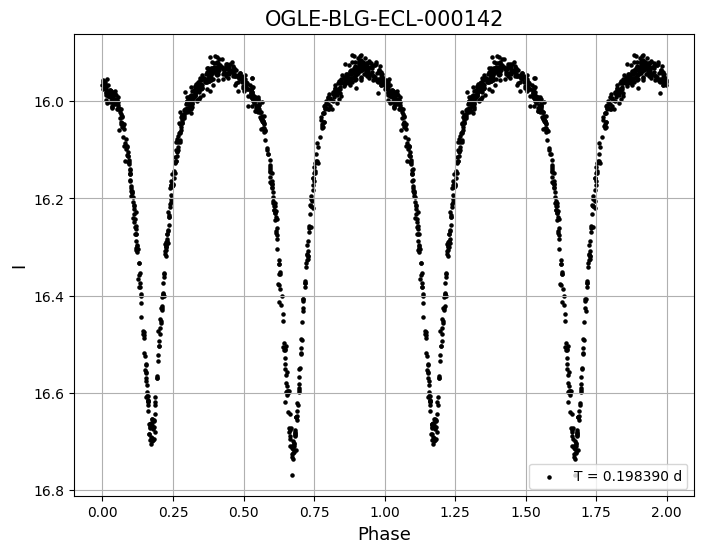

In [10]:
# Lomb-Scargle, Caso 1 es todos juntos, Caso 2 es uno por uno 
res = []
FWHMs = []
time_data = time_data_pt
T_max = 1
T_min = 0.05
frequency = np.linspace(1/T_max,1/T_min,int(1e6))
n_peaks = 1
lengths = np.array([])

for i in [138,142]:#num_l:
    
    if i < 226:

        if i < 10:
            num_ = f'00{i}' 
        elif i > 9 and i < 100:
            num_ = f'0{i}'
        else:
            num_ = i

        file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ECL-000{num_}.dat'
        name = f'OGLE-BLG-ECL-000{num_}'
        df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
        time = np.array(df['hjd'])
        mags = np.array(df['mag'])
        errs = np.array(df['err']) 

    elif i > 225:

        if i < 235:
            num = f'00{i - 225}' 
        elif i > 234:
            num = f'0{i - 225}'
 
        file_path = fr'C:\Users\damia\OneDrive\Documentos\1. Damián\Uniandes\Tesis\OGLE photometry\I\OGLE-BLG-ELL-000{num}.dat'
        name = f'OGLE-BLG-ELL-000{num}'

        df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['hjd', 'mag', 'err'])
        time = np.array(df['hjd'])
        mags = np.array(df['mag'])
        errs = np.array(df['err']) 


    fig = plt.figure(figsize = (8,6))
    plt.xlabel('Phase',fontsize = 13)
    plt.title(name, fontsize = 15)
    plt.ylabel('I', fontsize = 13)
    


    """
    fig, axs = plt.subplots(figsize = (8,10), nrows = len(time_data_pt) - 1, ncols = n_peaks)
    axs[-1].set_xlabel('Phase',fontsize = 13)
    axs[0].set_title(name, fontsize = 15)
    axs[2].set_ylabel('I', fontsize = 13)
    """

    """
    for obs_window in tqdm(range(len(time_data_pt) - 1)):
    time_ = time[time_data_pt[obs_window]:time_data_pt[obs_window + 1]]
    mags_ = mags[time_data_pt[obs_window]:time_data_pt[obs_window + 1]]
    errs_ = errs[time_data_pt[obs_window]:time_data_pt[obs_window + 1]]
    """
    time_ = time
    errs_ = errs
    mags_ = mags
    t0 = time_[0]
    lengths = np.append(lengths,len(mags_))
    power = LombScargle(time_, mags_, errs_).power(frequency)
    max_power = power.max()
    fap = LombScargle(time_, mags_, errs_).false_alarm_probability(max_power)
    possible_periods = []

    max_freq_indx = np.where(power == max_power)[0][0]
    max_freq = frequency[max_freq_indx]
    half_max = max_power / 2.0
        
    indx_right = max_freq_indx
    while indx_right < len(power) - 1 and power[indx_right] > half_max:
        indx_right += 1

        indx_left = max_freq_indx - (indx_right - max_freq_indx) 
        #print(indx_left,max_freq_indx,indx_right)

    FWHMs.append(frequency[indx_right] - frequency[indx_left])   

    for i in range(n_peaks):
        if fap > .6 * max_power:
            break
        peaks,_ = find_peaks(power)
        powerpeaks = power[peaks]
        power_order = np.sort(powerpeaks)[::-1]
        ind_peaks = []
        Freq_peaks = []
        Power_peaks = []
        Periodo_peaks = []
                
        ij = 0
        while(ij<n_peaks):
            if(power_order[ij] >= fap):
                ind_peaks = np.where(power == power_order[ij])[0][0]
                Freq_peaks.append(frequency[ind_peaks])
                Periodo_peaks.append(1 / Freq_peaks[-1])
                Power_peaks.append(power[ind_peaks])
                    
            ij += 1
                
        if 0 < len(Periodo_peaks):
            periodo = Periodo_peaks[i]

            m = 2

            plt.scatter(np.array(np.array((time_ - t0)) / (m*periodo) - np.int64(np.array((time_ - t0)) / (m*periodo))) + 1, mags_,c='k',s=5, label = f"T = {2*periodo:.6f} d")
            plt.scatter(np.array(np.array((time_ - t0)) / (m*periodo) - np.int64(np.array((time_ - t0)) / (m*periodo))), mags_,c='k',s=5)
            plt.gca().invert_yaxis()
            plt.grid(True)
            plt.legend(loc = 'lower right')

            """
            axs[obs_window].scatter(np.array(np.array((time_ - t0)) / (m*periodo) - np.int64(np.array((time_ - t0)) / (m*periodo))) + 1, mags_,c='k',s=5, label = f"T = {2*periodo:.6f} d")
            axs[obs_window].scatter(np.array(np.array((time_ - t0)) / (m*periodo) - np.int64(np.array((time_ - t0)) / (m*periodo))), mags_,c='k',s=5)
            axs[obs_window].invert_yaxis()
            axs[obs_window].grid(True)
            axs[obs_window].legend(loc = 'lower right')
            """
            t0_ = time_[0]
                        
            tf_ = time_[-1]

        res.append(round(m*periodo,6))
        mean_time_data_pt = list(mean_time_data_pt)

ValueError: x and y must be the same size

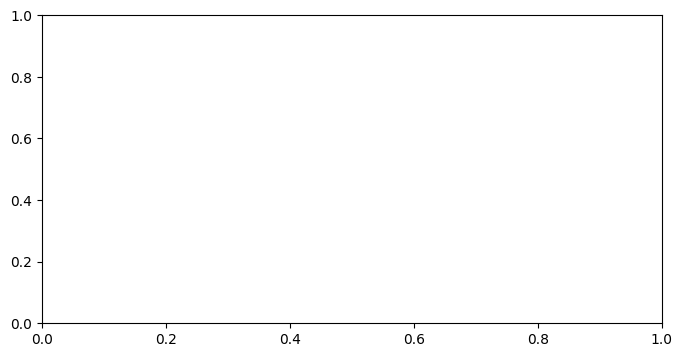

In [11]:
#Gráfico del cambio de período




#dres = [res[-2],res[-4]]#,res[-5]]
#dmean = [mean_time_data_pt[-2],mean_time_data_pt[-4]]#,mean_time_data_pt[-5]]


#del res[n]
#del mean_time_data_pt[n]


fig = plt.figure(figsize = (8,4))
plt.scatter(mean_time_data_pt, res, c = 'k', s = 5)
#plt.scatter(dmean, dres, c = 'r', s = 5)
#yticks = np.arange(min(res), max(res), 1e-6)
#plt.yticks(yticks[::3])
plt.grid(True, linewidth = .33)
plt.title(f'Period change of {name}', fontsize = 15)
plt.ylabel('T [d]', fontsize = 12)
plt.xlabel('HJD - 2450000', fontsize = 12)
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_time_data_pt, res)
line = slope * np.array(mean_time_data_pt) + intercept
plt.plot(mean_time_data_pt, line, color='red', label=f'T[d] = {slope*1e8:.2f}$\\times 10^{{-8}}$d + {intercept:.2f}')
plt.legend()

res = list(res)
mean_time_data_pt = list(mean_time_data_pt)

In [ ]:
aa = res
#del aa[-2]
mm = mean_time_data_pt 
#del mm[-2]

[0.174704, 0.174703, 0.174706, 0.174705]


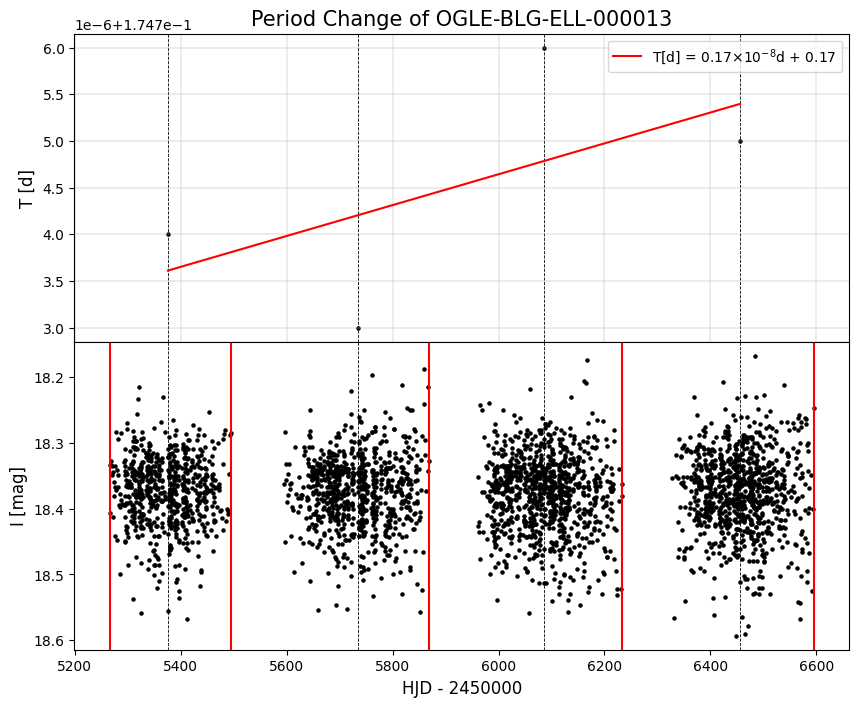

In [ ]:
# Create a figure with two subplots (one on top of the other)
print(res)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# First plot: Period change graph
ax1.scatter(mean_time_data_pt, res, c='k', s=5)
#ax1.scatter(dmean, dres, c = 'r', s = 15)

for i in mean_time_data_pt:
    ax1.axvline(i,c='k',zorder=-2,ls='--',lw=.6)
    slope, intercept, r_value, p_value, std_err = stats.linregress(mm, aa)
line = slope * np.array(mm) + intercept
ax1.set_title(f'Period Change of OGLE-BLG-ELL-000013', fontsize=15)
ax1.set_ylabel('T [d]', fontsize=12)
ax1.plot(mean_time_data_pt, line, color='red', label=f'T[d] = {slope*1e8:.2f}$\\times 10^{{-8}}$d + {intercept:.2f}')
ax1.legend()
ax1.grid(True, linewidth=0.33)

# Second plot: Time series with separation of data points
ax2.invert_yaxis()

ax2.set_xlabel('HJD - 2450000', fontsize=12)
ax2.set_ylabel('I [mag]', fontsize=12)


# Plot vertical lines for time data points
for idf,i in enumerate(time_data_pt):
    if idf == 0:
        c = 'r'
    else:
        c = 'r'
    ax2.axvline(time[i], c=c, zorder=2)

# Calculate mean time points for each window and plot scatter for time vs magnitude

ax2.scatter(time, mags, c='k', s=5)


for idg,i in enumerate(mean_time_data_pt):
    if idg == 0:
        c = 'k'
    else:
        c = 'k'
    plt.axvline(i,c=c,zorder=-2,ls='--',lw=.6)
# Adjust the layout to remove vertical space between subplots
plt.subplots_adjust(hspace=0)

# Show the combined plot
plt.show()

C:\Users\damia\AppData\Local\Temp\ipykernel_3404\3541278734.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(sinusoidal, mean_time_data_pt, res, p0=[(max(res) - min(res))*2000, 0.00061, 108, res[0]])


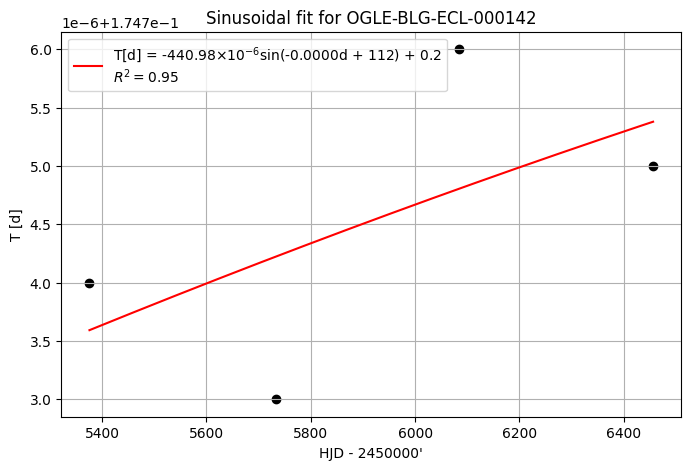

In [ ]:
#Ajuste sinusoidal para 023
def sinusoidal(x, a, b, c, d):
    return a*np.sin(b * x + c) + d

# Ajuste de la curva
params, covariance = curve_fit(sinusoidal, mean_time_data_pt, res, p0=[(max(res) - min(res))*2000, 0.00061, 108, res[0]])

# Generar datos ajustados
x_fit = np.linspace(min(mean_time_data_pt), max(mean_time_data_pt), 500)
y_fit = sinusoidal(x_fit, *params)


plt.figure(figsize=(8, 5))
plt.scatter(mean_time_data_pt, res, color="k")
plt.plot(x_fit, y_fit, color="red", label=f'T[d] = {params[0]*1e6:.2f}$\\times 10^{{-6}}$sin({params[1]:.4f}d + {params[2]:.0f}) + {params[3]:.1f}\n$R^2 = 0.95$')
plt.xlabel("HJD - 2450000'")
plt.ylabel("T [d]")
plt.title("Sinusoidal fit for OGLE-BLG-ECL-000142")
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Minimum           Weighted mean           Mode')

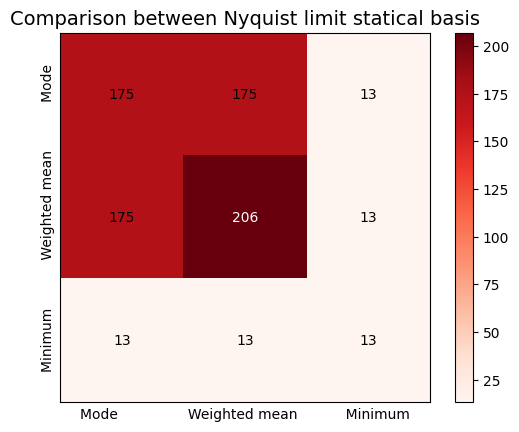

In [ ]:
#Matriz de comparación entre recursos estadísticos para hallar la frecuencia de muestreo
matrix = np.zeros((3, 3), dtype=int)
matrix[0, 0] = len(a[0])
matrix[1, 1] = len(a[1])
matrix[2, 2] = len(a[2])

matrix[0, 1] = matrix[1, 0] = len(set(a[0]).intersection(a[1]))
matrix[0, 2] = matrix[2, 0] = len(set(a[0]).intersection(a[2]))
matrix[1, 2] = matrix[2, 1] = len(set(a[1]).intersection(a[2]))

fig, ax = plt.subplots()

# Plot the matrix with colors
cax = ax.imshow(matrix, cmap='Reds', interpolation='nearest')

# Add the colorbar to indicate the scale
fig.colorbar(cax)

# Add numbers inside each cell
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if i == 1 and j == 1:
            ax.text(j, i, '206', ha='center', va='center', color='w')
        elif i == 0 and j == 1:
            ax.text(j, i, f'{matrix[i, j]:.0f}', ha='center', va='center', color='k')
        elif i == 1 and j == 0:
            ax.text(j, i, f'{matrix[i, j]:.0f}', ha='center', va='center', color='k')
        elif i == 0 and j == 0:
            ax.text(j, i, f'{matrix[i, j]:.0f}', ha='center', va='center', color='k')
        else:
            ax.text(j, i, f'{matrix[i, j]:.0f}', ha='center', va='center', color='k')
ax.set_xticks([])  # Remove xticks
ax.set_yticks([]) 
# Set title and show plot
plt.title("Comparison between Nyquist limit statical basis", fontsize = 14)
plt.xlabel("Mode                Weighted mean           Minimum")
plt.ylabel("Minimum           Weighted mean           Mode")